In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter

In [2]:
path = '../input/'

with open(f'{path}mission-dtypes.yaml', 'r') as yamlfile:
    mission_dtypes = yaml.load(yamlfile)

In [3]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
#                  'dtype': dtypes,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

In [5]:
df2 = pd.read_csv(f'{path}ice-air-missions-2.csv.gz', **read_csv_opts)

/Users/philneff/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16967 entries, 0 to 16966
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MissionID                  16967 non-null  int64         
 1   MissionNumber              16967 non-null  int64         
 2   MsnTailNumber              16966 non-null  object        
 3   MissionDate                16967 non-null  datetime64[ns]
 4   MissionFY                  16967 non-null  int64         
 5   MissionMonth               16967 non-null  int64         
 6   MissionWeek                16967 non-null  int64         
 7   MsnStart                   16967 non-null  object        
 8   MsnStpOne                  16838 non-null  object        
 9   MsnStpTwo                  12421 non-null  object        
 10  MsnStpThree                5375 non-null   object        
 11  MsnStpFour                 1662 non-null   object        
 12  MsnS

In [7]:
df3 = pd.read_csv(f'{path}ice-air-missions-3.csv.gz', **read_csv_opts)

In [8]:
df2['MissionNumber'].describe()

count     16967.000000
mean     146064.724878
std       24745.565132
min      110001.000000
25%      122091.500000
50%      141670.000000
75%      170253.500000
max      191228.000000
Name: MissionNumber, dtype: float64

In [9]:
df3['MissionNumber'].describe()

count      3182.000000
mean     194487.619736
std        4598.797028
min      190001.000000
25%      190835.250000
50%      191701.500000
75%      200368.750000
max      201272.000000
Name: MissionNumber, dtype: float64

In [12]:
df2 = df2.loc[df2['MissionNumber'] < df3['MissionNumber'].min()]

In [13]:
df = pd.concat([df2, df3])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19079 entries, 0 to 3233
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MissionID                  19079 non-null  int64         
 1   MissionNumber              19027 non-null  float64       
 2   MsnTailNumber              19026 non-null  object        
 3   MissionDate                19027 non-null  datetime64[ns]
 4   MissionFY                  19027 non-null  float64       
 5   MissionMonth               19027 non-null  float64       
 6   MissionWeek                19027 non-null  float64       
 7   MsnStart                   19027 non-null  object        
 8   MsnStpOne                  18878 non-null  object        
 9   MsnStpTwo                  13869 non-null  object        
 10  MsnStpThree                5889 non-null   object        
 11  MsnStpFour                 1758 non-null   object        
 12  MsnSt

In [14]:
len(df['MissionNumber'])

19079

In [17]:
len(set(df['MissionNumber']))

19079

In [16]:
df['MissionDate'].describe()

/Users/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   19027
unique                   2882
top       2012-06-28 00:00:00
freq                       13
first     2010-10-01 00:00:00
last      2020-05-08 00:00:00
Name: MissionDate, dtype: object

In [27]:
df['msnProposedFines'] = df['msnProposedFines'].astype(float)

In [31]:
df['msnEnforcedFines'] = df['msnEnforcedFines'].str.replace(',', '')

In [32]:
df['msnEnforcedFines'] = df['msnEnforcedFines'].astype(float)

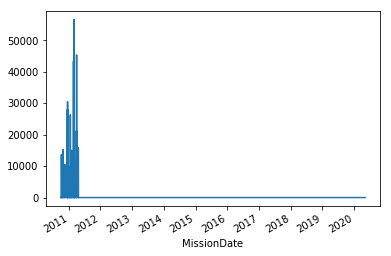

In [33]:
df.set_index('MissionDate')['msnProposedFines'].plot()

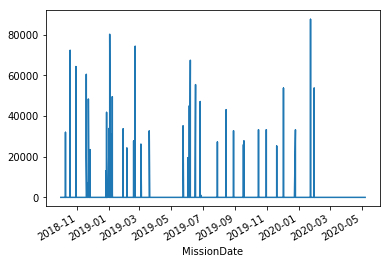

In [34]:
df.set_index('MissionDate')['msnEnforcedFines'].plot()

In [37]:
len(df.loc[df['msnEnforcedFines'] > 0])

42

In [36]:
df.loc[df['msnEnforcedFines'] > 0].to_csv('../output/enforcedfines.csv')